In [1]:
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def Model_IFA(DOC, Dc, UCS, V_Cutter_Equivalent, BR):
        #A model for IFA calculation. it takes DOC,
        #normalized cutter velocity, normalized rock 
        #UCS and cutter back rake and returns the IFA.
        UCSN = UCS/5000 # calculate the normalized UCS
        VN = V_Cutter_Equivalent/2.1 # normalize the equivalent velocity
        
        #amin thesis full bit IFA
        DOCn = DOC / Dc # normalize DOC
        a = 57.3 + (-96.44)/((VN)**0.753 + 2.22)
        b = 1.886 + (0.48)/((VN)**1.6 + 0.79)
        c = 1.58
        d = 0 + (1.07)/((UCSN**1.9) + 3)
        
        #GH approach for Carthage+single cutter+RH data
        '''DOCn = DOC / Dc # normalize DOC
        a = 32.29 + (-161.32)/((VN)**0.854 + 16.7)
        b = 34.56 + (-187.32)/((VN)**2.43 + 10.12)
        c = 0.462
        d = 0 + 18.04/((UCSN**2.26) + 20.68)'''
        
        #single cutter IFA from amin thesis
        '''DOCn = DOC / Dc # normalize DOC
        a = 70.66 + (-130.09)/((VN)**0.99 + 2.77)
        b = 0.49 + (19.62)/((VN)**1.15 + 40)
        c = 1.24
        d = 0.014 + 0.99/((UCSN**2.72) + 2.09)'''
        
        #GH-IFA (B)
        DOCn = DOC / Dc # normalize DOC
        a = 5.55 + (-147.81)/((VN)**0.696 + 2.98)
        b = 150 + (26.6)/((VN)**0.935 + 100.0)
        c = 0.193
        d = 0 + (150)/((UCSN**2.36) + 91.75)
        
        
 
        return (a+b/((DOCn**c)+d))-BR

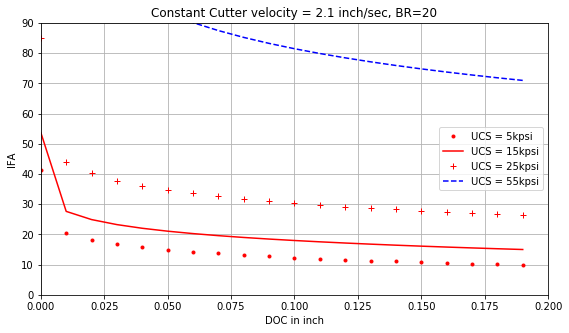

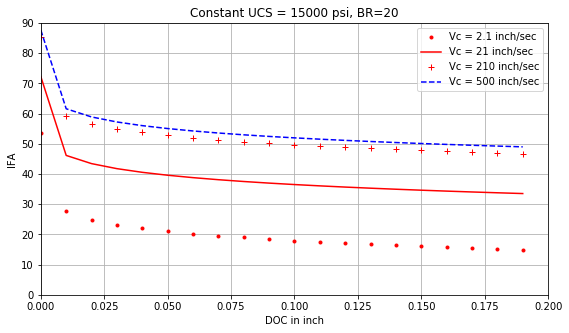

In [3]:
DOC_list = []
DOC_list = list(range(0,20))
DOC_list = [DOC/100 for DOC in DOC_list]
                # DOC, UCS, Db, RPM, BR, Dc

IFA5K =  [Model_IFA(DOC, 0.5, 5000, 2.1, 20) for DOC in DOC_list]
IFA15K = [Model_IFA(DOC, 0.5, 15000, 2.1, 20) for DOC in DOC_list]
IFA25K = [Model_IFA(DOC, 0.5, 25000, 2.1, 20) for DOC in DOC_list]
IFA55K = [Model_IFA(DOC, 0.5, 55000, 2.1, 20) for DOC in DOC_list]

fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1,2,1)
plt.plot(DOC_list, IFA5K, 'r.', label='UCS = 5kpsi')
plt.plot(DOC_list, IFA15K, 'r-', label='UCS = 15kpsi')
plt.plot(DOC_list, IFA25K, 'r+', label='UCS = 25kpsi')
plt.plot(DOC_list, IFA55K, 'b--', label='UCS = 55kpsi')
plt.title('Constant Cutter velocity = 2.1 inch/sec, BR=20')

plt.xlabel('DOC in inch')
plt.ylabel('IFA')
plt.xlim(0,0.2)
plt.ylim(0,90)
plt.grid()
plt.legend()



IFA_Vc1 =  [Model_IFA(DOC, 0.5, 15000, 2.1, 20) for DOC in DOC_list]
IFA_Vc2 = [Model_IFA(DOC, 0.5, 15000, 21, 20) for DOC in DOC_list]
IFA_Vc3 = [Model_IFA(DOC, 0.5, 15000, 210, 20) for DOC in DOC_list]
IFA_Vc4 = [Model_IFA(DOC, 0.5, 15000, 500, 20) for DOC in DOC_list]

fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(1,2,2)
plt.plot(DOC_list, IFA_Vc1, 'r.', label='Vc = 2.1 inch/sec')
plt.plot(DOC_list, IFA_Vc2, 'r-', label='Vc = 21 inch/sec')
plt.plot(DOC_list, IFA_Vc3, 'r+', label='Vc = 210 inch/sec')
plt.plot(DOC_list, IFA_Vc4, 'b--', label='Vc = 500 inch/sec')
plt.title('Constant UCS = 15000 psi, BR=20')

plt.xlabel('DOC in inch')
plt.ylabel('IFA')
plt.xlim(0,0.2)
plt.ylim(0,90)
plt.grid()
plt.legend()
